# <center>Traffic Signs Detection</center>

In [10]:
import os
import plotly.io as pio
import plotly.express as px
import numpy as np
import cv2 as cv
from plotly.subplots import make_subplots
from ultralytics import YOLO
from ultralytics.utils.ops import xywhn2xyxy

DATASET_PATH = '/mnt/s/CV/traffic_signs_dataset/car'
LABELS = [
    'Green Light', 'Red Light', 'Speed Limit 10', 
    'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120',
    'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 
    'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 
    'Speed Limit 80', 'Speed Limit 90', 'Stop'
]
pio.renderers.default = 'png'
pio.templates.default = 'plotly_dark'

## Data overview
Visualize 10 images with bounding boxes and their labels.

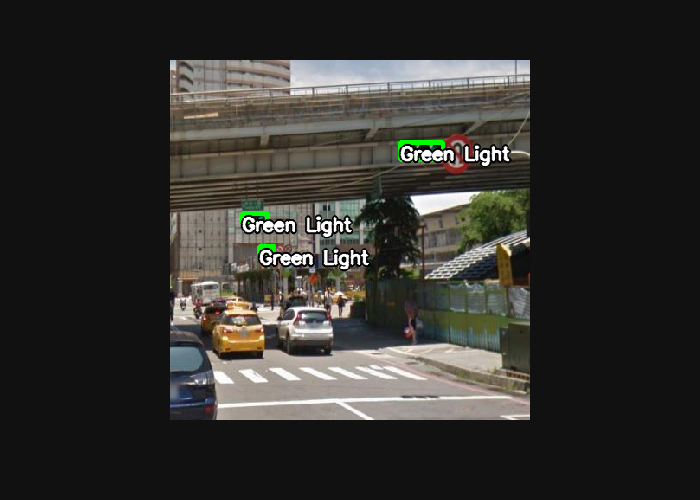

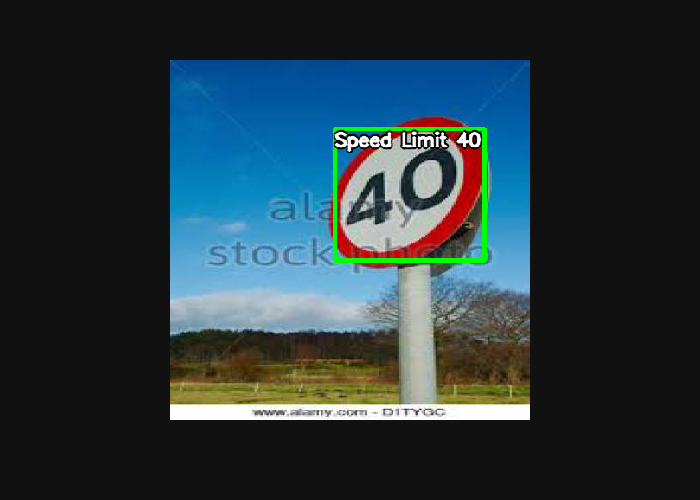

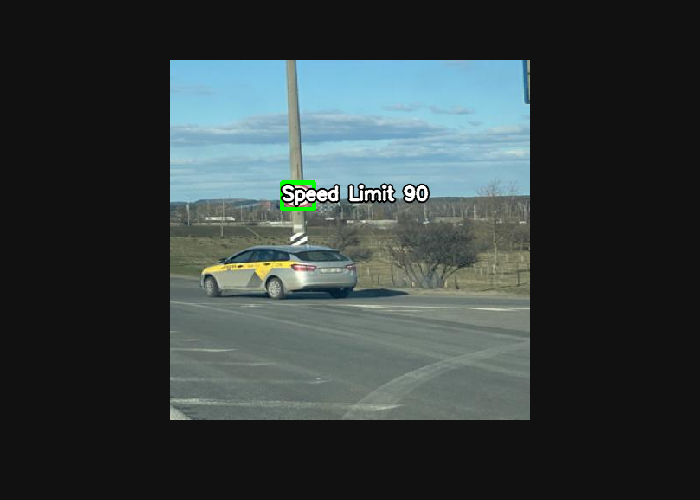

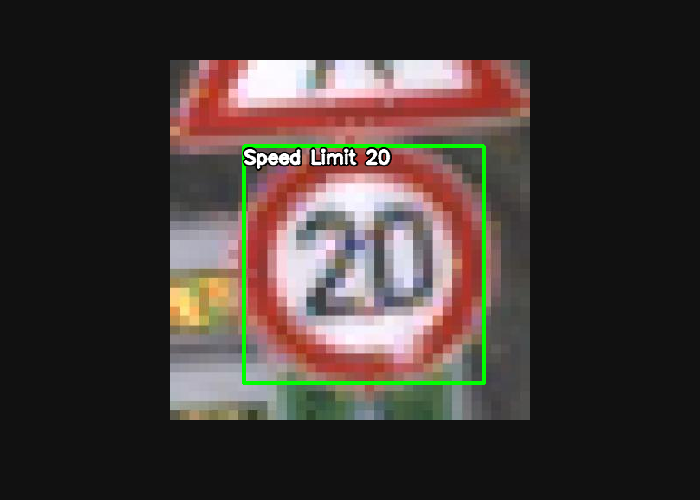

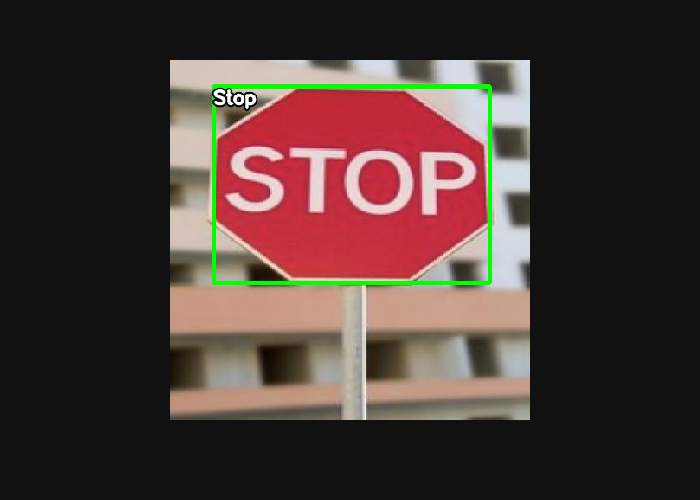

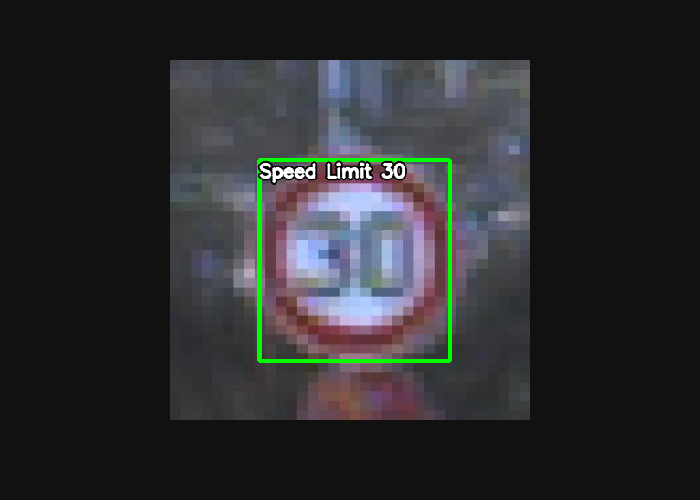

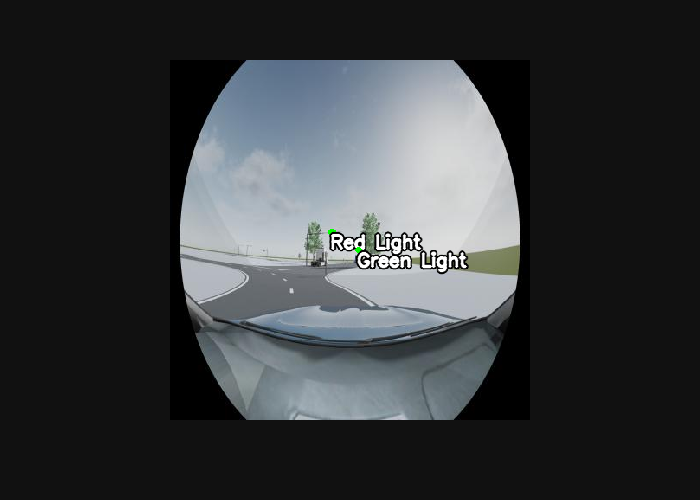

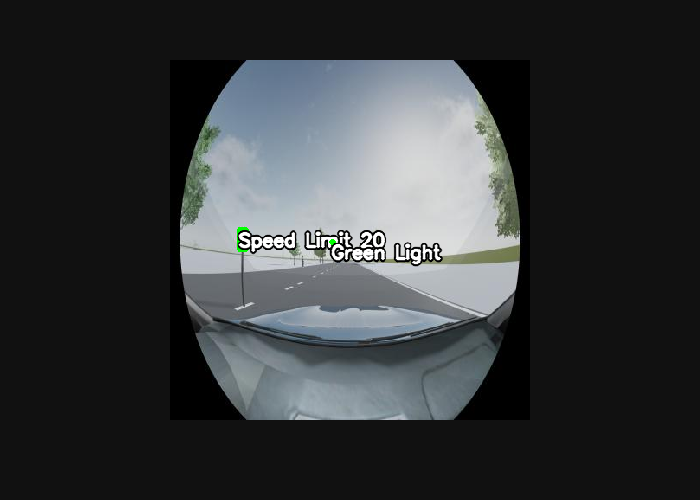

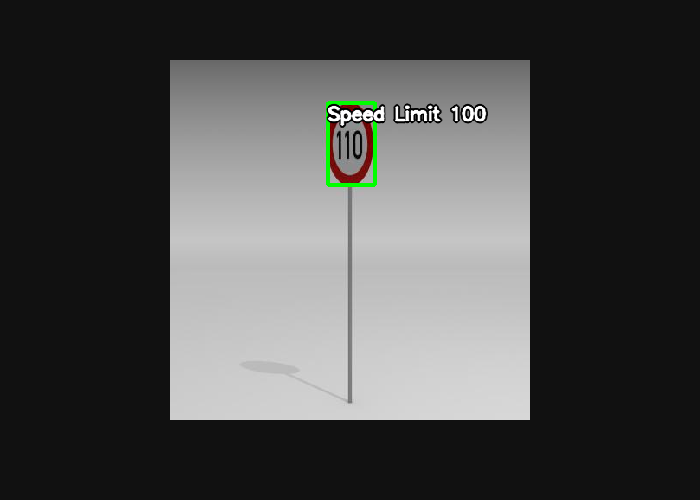

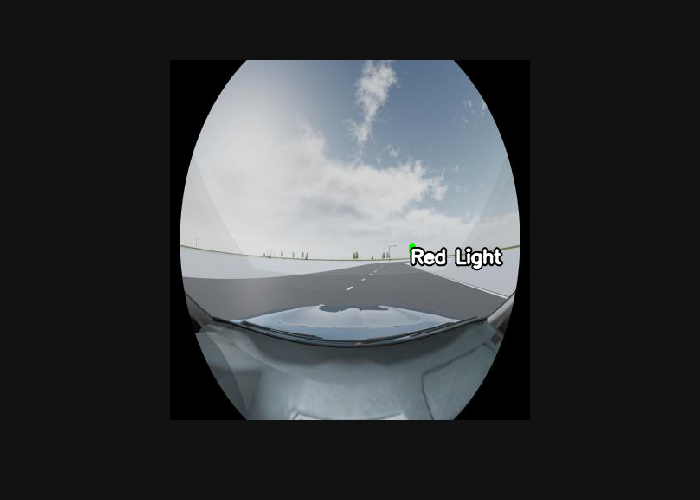

In [2]:
for _ in range(10):
    img_name = np.random.choice(os.listdir(os.path.join(DATASET_PATH, 'train/images')))
    label_name = img_name.split('.jpg')[0] + '.txt'
    img_path = os.path.join(DATASET_PATH, 'train/images/', img_name)
    label_path = os.path.join(DATASET_PATH, 'train/labels/', label_name)
    img = cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB)
    with open(label_path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        label_idx, x, y, w, h = [float(output.rstrip('\n')) for output in line.split()]
        label_idx = int(label_idx)
        xywhn = np.array([x, y, w, h])
        # Convert from normalized xywh to xyxy
        xyxy = xywhn2xyxy(xywhn, img.shape[1], img.shape[0]).astype(np.int32)
        # Add bounding box
        cv.rectangle(img, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), color=(0, 255, 0), thickness=3)
        text_config = dict(
            img=img, 
            text=LABELS[label_idx], 
            org=(int(xyxy[0]), int(xyxy[1])+20), 
            fontFace=cv.FONT_HERSHEY_SIMPLEX, 
            fontScale=0.7,
            lineType=cv.LINE_AA
        )
        # Add black border
        cv.putText(**text_config, thickness=6, color=(0, 0, 0))
        # Add white text
        cv.putText(**text_config, thickness=2, color=(255, 255, 255)) 
    fig = px.imshow(img).update_xaxes(visible=False).update_yaxes(visible=False)
    fig.show()

## Training

In [3]:
model = YOLO('yolov8n.pt', task='detection')
history = model.train(
    data=DATASET_PATH + '/data.yaml',
    epochs=100,
    imgsz=416,
    batch=8,
    name='yolov8n',
    project='./runs'
)

Ultralytics YOLOv8.2.52 🚀 Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12288MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/mnt/s/CV/traffic_signs_dataset/car/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=./runs, name=yolov8n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

train: Scanning /mnt/s/CV/traffic_signs_dataset/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]
val: Scanning /mnt/s/CV/traffic_signs_dataset/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs/yolov8n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/yolov8n
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.885G       0.82      3.076      1.075          5        416: 100%|██████████| 442/442 [00:23<00:00, 19.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 18.96it/s]

                   all        801        944      0.215      0.419      0.253      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.851G     0.7678      2.261      1.028          2        416: 100%|██████████| 442/442 [00:22<00:00, 19.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.03it/s]

                   all        801        944      0.331      0.505      0.324      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.854G     0.7588      2.025      1.017          3        416: 100%|██████████| 442/442 [00:16<00:00, 26.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.56it/s]

                   all        801        944      0.402      0.564      0.438      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.851G     0.7217      1.776     0.9984          2        416: 100%|██████████| 442/442 [00:23<00:00, 19.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 19.07it/s]

                   all        801        944      0.492      0.605      0.535      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.851G     0.7068       1.57     0.9913          4        416: 100%|██████████| 442/442 [00:22<00:00, 19.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.31it/s]

                   all        801        944      0.578      0.623       0.64      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.851G     0.6929       1.43     0.9806          6        416: 100%|██████████| 442/442 [00:16<00:00, 26.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.04it/s]

                   all        801        944      0.694      0.644      0.722      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.851G     0.6698      1.312     0.9754          5        416: 100%|██████████| 442/442 [00:20<00:00, 21.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.02it/s]

                   all        801        944      0.792      0.711      0.784      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.851G     0.6531      1.213     0.9688          2        416: 100%|██████████| 442/442 [00:20<00:00, 21.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.24it/s]

                   all        801        944      0.777      0.731      0.793      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.851G     0.6468      1.164     0.9682          3        416: 100%|██████████| 442/442 [00:16<00:00, 26.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.70it/s]

                   all        801        944      0.838      0.732      0.826      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.851G     0.6478       1.08     0.9635          5        416: 100%|██████████| 442/442 [00:20<00:00, 21.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.54it/s]

                   all        801        944      0.831      0.762      0.829      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.851G     0.6474      1.057      0.961          3        416: 100%|██████████| 442/442 [00:17<00:00, 24.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.35it/s]

                   all        801        944      0.809       0.77      0.827      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.851G     0.6354      1.034     0.9614          8        416: 100%|██████████| 442/442 [00:21<00:00, 20.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.70it/s]

                   all        801        944      0.864       0.77      0.848      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.851G     0.6335      0.987     0.9622          9        416: 100%|██████████| 442/442 [00:20<00:00, 22.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.62it/s]

                   all        801        944      0.895      0.779       0.86      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.851G     0.6275     0.9588     0.9508          5        416: 100%|██████████| 442/442 [00:16<00:00, 26.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.01it/s]

                   all        801        944      0.874      0.779      0.858      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.851G     0.6173      0.918     0.9525          8        416: 100%|██████████| 442/442 [00:20<00:00, 21.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 25.03it/s]

                   all        801        944      0.928      0.793      0.874      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.851G     0.6076     0.8762     0.9505          4        416: 100%|██████████| 442/442 [00:17<00:00, 24.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.26it/s]

                   all        801        944      0.932      0.806      0.881      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.851G     0.6046     0.8789     0.9483          3        416: 100%|██████████| 442/442 [00:19<00:00, 22.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.47it/s]

                   all        801        944      0.918      0.787      0.873      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.851G      0.613     0.8514     0.9506          7        416: 100%|██████████| 442/442 [00:20<00:00, 21.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.81it/s]

                   all        801        944      0.937      0.802      0.883      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.851G     0.6056     0.8409     0.9495          1        416: 100%|██████████| 442/442 [00:16<00:00, 26.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 18.14it/s]

                   all        801        944      0.949      0.776      0.877      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.851G     0.5992     0.8221     0.9429          6        416: 100%|██████████| 442/442 [00:22<00:00, 19.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.01it/s]

                   all        801        944      0.928      0.802      0.881      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.851G     0.5996     0.8206     0.9466          8        416: 100%|██████████| 442/442 [00:16<00:00, 26.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  9.08it/s]

                   all        801        944      0.926      0.822      0.891      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.851G     0.5927     0.7889     0.9436          3        416: 100%|██████████| 442/442 [00:16<00:00, 27.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 25.00it/s]

                   all        801        944       0.95      0.823      0.893      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.851G     0.5869     0.7871     0.9394          3        416: 100%|██████████| 442/442 [00:19<00:00, 23.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:01<00:00, 25.92it/s]

                   all        801        944       0.95       0.81      0.892      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.851G     0.6034      0.782     0.9453          5        416: 100%|██████████| 442/442 [00:15<00:00, 29.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:01<00:00, 26.01it/s]

                   all        801        944      0.951      0.822      0.889      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.851G     0.5884     0.7671     0.9407          7        416: 100%|██████████| 442/442 [00:19<00:00, 22.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:01<00:00, 25.58it/s]

                   all        801        944      0.936      0.825      0.897      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.851G      0.576     0.7624     0.9379          4        416: 100%|██████████| 442/442 [00:15<00:00, 28.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.69it/s]

                   all        801        944      0.955      0.813      0.894      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.851G     0.5773     0.7477      0.939          3        416: 100%|██████████| 442/442 [00:19<00:00, 23.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 20.98it/s]

                   all        801        944      0.943      0.818      0.896       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.851G     0.5781     0.7346      0.933          6        416: 100%|██████████| 442/442 [00:16<00:00, 27.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.97it/s]

                   all        801        944       0.95      0.827      0.904      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.849G     0.5832     0.7255     0.9392          4        416: 100%|██████████| 442/442 [00:19<00:00, 22.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.15it/s]

                   all        801        944      0.958      0.817      0.898      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.851G     0.5723     0.7204     0.9357          3        416: 100%|██████████| 442/442 [00:19<00:00, 22.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.65it/s]

                   all        801        944      0.954      0.826      0.901      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.851G      0.584     0.7313     0.9392          4        416: 100%|██████████| 442/442 [00:16<00:00, 27.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.06it/s]

                   all        801        944       0.94      0.835      0.902      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.851G     0.5693     0.6995     0.9339          5        416: 100%|██████████| 442/442 [00:20<00:00, 22.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 18.92it/s]

                   all        801        944      0.944      0.844      0.907      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.851G     0.5761     0.7028     0.9324          6        416: 100%|██████████| 442/442 [00:16<00:00, 26.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.48it/s]

                   all        801        944      0.934      0.859      0.911      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.851G     0.5702     0.6898     0.9281          4        416: 100%|██████████| 442/442 [00:19<00:00, 22.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.07it/s]

                   all        801        944      0.913      0.855      0.911      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.851G     0.5623     0.6822     0.9289          6        416: 100%|██████████| 442/442 [00:17<00:00, 25.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  8.65it/s]

                   all        801        944      0.947      0.835      0.914      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.851G     0.5704       0.69     0.9361          7        416: 100%|██████████| 442/442 [00:17<00:00, 25.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.04it/s]

                   all        801        944      0.952      0.853      0.914      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.851G      0.565     0.6771     0.9316          2        416: 100%|██████████| 442/442 [00:22<00:00, 19.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.73it/s]

                   all        801        944      0.946      0.853      0.912      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.851G     0.5548     0.6616     0.9295          2        416: 100%|██████████| 442/442 [00:18<00:00, 23.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.80it/s]

                   all        801        944      0.962      0.839      0.919      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.851G     0.5603     0.6622     0.9267          0        416: 100%|██████████| 442/442 [00:22<00:00, 19.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.91it/s]

                   all        801        944      0.937      0.864      0.921        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.851G     0.5612     0.6599     0.9312          4        416: 100%|██████████| 442/442 [00:23<00:00, 19.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.22it/s]

                   all        801        944      0.937      0.861      0.913      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.851G     0.5604     0.6503     0.9326          5        416: 100%|██████████| 442/442 [00:18<00:00, 24.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.82it/s]

                   all        801        944      0.943      0.865      0.917      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.851G     0.5463     0.6384     0.9233          9        416: 100%|██████████| 442/442 [00:21<00:00, 20.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.26it/s]

                   all        801        944      0.942      0.867      0.921      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.851G     0.5556     0.6547     0.9275          4        416: 100%|██████████| 442/442 [00:22<00:00, 19.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.05it/s]

                   all        801        944      0.944      0.849      0.917      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.851G     0.5452     0.6324     0.9222          3        416: 100%|██████████| 442/442 [00:17<00:00, 24.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.64it/s]

                   all        801        944      0.926      0.863      0.917      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.851G     0.5501     0.6312     0.9277          5        416: 100%|██████████| 442/442 [00:20<00:00, 21.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.99it/s]

                   all        801        944      0.945      0.865      0.919      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.849G     0.5375      0.623     0.9268          5        416: 100%|██████████| 442/442 [00:16<00:00, 26.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  9.01it/s]

                   all        801        944      0.936      0.855      0.917      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.851G     0.5555     0.6274     0.9257          6        416: 100%|██████████| 442/442 [00:17<00:00, 25.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.84it/s]

                   all        801        944      0.954      0.855      0.919      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.849G     0.5434     0.6088     0.9236          2        416: 100%|██████████| 442/442 [00:21<00:00, 20.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.77it/s]

                   all        801        944       0.95      0.856      0.918      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.851G     0.5356     0.6158     0.9243          3        416: 100%|██████████| 442/442 [00:17<00:00, 25.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.01it/s]

                   all        801        944      0.954      0.854      0.921      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.851G     0.5422     0.6094     0.9206          5        416: 100%|██████████| 442/442 [00:20<00:00, 21.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.28it/s]

                   all        801        944      0.961      0.846      0.923        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.851G      0.544     0.5994     0.9238          3        416: 100%|██████████| 442/442 [00:16<00:00, 26.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  8.98it/s]

                   all        801        944      0.911      0.867      0.922      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.851G     0.5387     0.5945     0.9247          4        416: 100%|██████████| 442/442 [00:16<00:00, 27.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.96it/s]

                   all        801        944      0.965      0.842      0.924      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.851G     0.5266     0.5927       0.92          3        416: 100%|██████████| 442/442 [00:20<00:00, 21.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.47it/s]

                   all        801        944      0.952      0.868      0.923      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.849G      0.535     0.5947     0.9218          3        416: 100%|██████████| 442/442 [00:18<00:00, 24.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.29it/s]

                   all        801        944      0.943      0.867       0.92      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.851G     0.5216     0.5948     0.9169          5        416: 100%|██████████| 442/442 [00:22<00:00, 19.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.13it/s]

                   all        801        944      0.941      0.865      0.924      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.851G     0.5285      0.592     0.9222          4        416: 100%|██████████| 442/442 [00:20<00:00, 21.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.04it/s]

                   all        801        944      0.947      0.865      0.926      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.851G     0.5215     0.5871      0.917          2        416: 100%|██████████| 442/442 [00:18<00:00, 24.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.99it/s]

                   all        801        944      0.949      0.869      0.926      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.851G     0.5215      0.583     0.9149          3        416: 100%|██████████| 442/442 [00:21<00:00, 20.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.85it/s]

                   all        801        944      0.929      0.878      0.927        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.851G     0.5279     0.5629     0.9181          2        416: 100%|██████████| 442/442 [00:17<00:00, 25.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  8.77it/s]

                   all        801        944      0.933      0.872      0.928      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.851G     0.5182     0.5713     0.9138          8        416: 100%|██████████| 442/442 [00:17<00:00, 25.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.18it/s]

                   all        801        944      0.937      0.864      0.925      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.851G     0.5117     0.5552     0.9115          7        416: 100%|██████████| 442/442 [00:20<00:00, 21.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.63it/s]

                   all        801        944      0.943      0.858      0.921      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.851G     0.5154     0.5583     0.9176          4        416: 100%|██████████| 442/442 [00:17<00:00, 25.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.84it/s]

                   all        801        944      0.953      0.861      0.925      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.849G      0.511     0.5552     0.9117          4        416: 100%|██████████| 442/442 [00:21<00:00, 20.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.33it/s]

                   all        801        944      0.929      0.877      0.925      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.851G     0.5128     0.5449     0.9116          3        416: 100%|██████████| 442/442 [00:16<00:00, 27.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.72it/s]

                   all        801        944      0.932      0.877      0.928      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.851G      0.514     0.5496     0.9123          6        416: 100%|██████████| 442/442 [00:15<00:00, 27.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.44it/s]

                   all        801        944      0.928      0.887      0.928      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.851G     0.5075     0.5409     0.9124          5        416: 100%|██████████| 442/442 [00:20<00:00, 21.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.85it/s]

                   all        801        944      0.934      0.884      0.927       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.851G     0.5088     0.5428     0.9127          4        416: 100%|██████████| 442/442 [00:16<00:00, 26.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.35it/s]

                   all        801        944      0.931      0.872      0.924      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.851G     0.5048     0.5246     0.9122          5        416: 100%|██████████| 442/442 [00:19<00:00, 22.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.97it/s]

                   all        801        944      0.943      0.858      0.924      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.851G     0.5146     0.5452     0.9123          5        416: 100%|██████████| 442/442 [00:16<00:00, 27.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.72it/s]

                   all        801        944      0.953      0.875      0.928      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.851G     0.5069     0.5378     0.9095          7        416: 100%|██████████| 442/442 [00:19<00:00, 22.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.67it/s]

                   all        801        944      0.957      0.878      0.932      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.851G     0.5001     0.5248     0.9081          5        416: 100%|██████████| 442/442 [00:16<00:00, 27.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  8.93it/s]

                   all        801        944      0.961       0.86      0.929      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.851G     0.5039     0.5218     0.9093          2        416: 100%|██████████| 442/442 [00:16<00:00, 26.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.74it/s]

                   all        801        944      0.961      0.871      0.928      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.851G      0.499      0.524     0.9106          4        416: 100%|██████████| 442/442 [00:19<00:00, 22.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.65it/s]

                   all        801        944      0.952      0.879       0.93      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.851G     0.4934     0.5119     0.9093          5        416: 100%|██████████| 442/442 [00:16<00:00, 26.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.35it/s]

                   all        801        944      0.947      0.887       0.93      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.851G     0.4971     0.5182     0.9094          5        416: 100%|██████████| 442/442 [00:21<00:00, 20.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.11it/s]

                   all        801        944      0.941      0.888       0.93       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.849G     0.4918     0.5098     0.9057          4        416: 100%|██████████| 442/442 [00:16<00:00, 27.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  8.68it/s]

                   all        801        944      0.959      0.868      0.929      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.851G     0.4966     0.5047     0.9097          3        416: 100%|██████████| 442/442 [00:16<00:00, 26.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.66it/s]

                   all        801        944      0.948      0.877       0.93      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.851G     0.4955     0.5061      0.909          4        416: 100%|██████████| 442/442 [00:20<00:00, 21.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.19it/s]

                   all        801        944      0.957       0.88       0.93      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.851G     0.4891     0.5043     0.9072          5        416: 100%|██████████| 442/442 [00:16<00:00, 26.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.51it/s]

                   all        801        944      0.953      0.892      0.932      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.851G     0.4883     0.5042     0.9049          3        416: 100%|██████████| 442/442 [00:20<00:00, 21.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.31it/s]

                   all        801        944      0.953      0.883      0.932      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.851G     0.4804     0.4882     0.9022          5        416: 100%|██████████| 442/442 [00:16<00:00, 26.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.20it/s]

                   all        801        944      0.945      0.883      0.932      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.851G     0.4819     0.4938     0.9048          2        416: 100%|██████████| 442/442 [00:17<00:00, 25.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.29it/s]

                   all        801        944      0.963      0.887      0.935      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.849G      0.492        0.5     0.9054          8        416: 100%|██████████| 442/442 [00:20<00:00, 21.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.86it/s]

                   all        801        944      0.964      0.882      0.935      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.851G     0.4787     0.4797     0.9042          4        416: 100%|██████████| 442/442 [00:16<00:00, 26.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.91it/s]

                   all        801        944      0.952      0.884      0.933      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.851G     0.4813     0.4857     0.9045          9        416: 100%|██████████| 442/442 [00:20<00:00, 21.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.11it/s]

                   all        801        944      0.942      0.887      0.932      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.851G      0.475     0.4806     0.9038          3        416: 100%|██████████| 442/442 [00:17<00:00, 25.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:05<00:00,  8.85it/s]

                   all        801        944      0.956      0.888      0.935      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.851G     0.4835     0.4772     0.8999          3        416: 100%|██████████| 442/442 [00:16<00:00, 26.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:01<00:00, 25.73it/s]

                   all        801        944      0.951      0.886      0.936      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.851G     0.4795     0.4769     0.9041          4        416: 100%|██████████| 442/442 [00:20<00:00, 21.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.98it/s]

                   all        801        944      0.951      0.891      0.937      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.851G     0.4739     0.4703      0.902          4        416: 100%|██████████| 442/442 [00:16<00:00, 26.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.09it/s]

                   all        801        944      0.938      0.894      0.933      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.851G     0.4751     0.4682        0.9          6        416: 100%|██████████| 442/442 [00:19<00:00, 22.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.84it/s]

                   all        801        944      0.947      0.884      0.931      0.818


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.849G      0.464     0.2965     0.8487          2        416: 100%|██████████| 442/442 [00:15<00:00, 28.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.96it/s]

                   all        801        944      0.947      0.883      0.935      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.849G     0.4651     0.3011     0.8507          1        416: 100%|██████████| 442/442 [00:20<00:00, 22.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.44it/s]

                   all        801        944      0.951      0.888      0.933      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.849G     0.4594     0.2898     0.8467          2        416: 100%|██████████| 442/442 [00:20<00:00, 21.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:01<00:00, 25.50it/s]

                   all        801        944      0.945      0.897      0.935       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.849G     0.4623     0.2977     0.8507          2        416: 100%|██████████| 442/442 [00:18<00:00, 24.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.00it/s]

                   all        801        944      0.941      0.893      0.934      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.849G     0.4555     0.2841      0.849          2        416: 100%|██████████| 442/442 [00:20<00:00, 22.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 22.89it/s]

                   all        801        944      0.962      0.872      0.934      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.849G     0.4526     0.2817     0.8496          3        416: 100%|██████████| 442/442 [00:16<00:00, 26.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 24.33it/s]

                   all        801        944      0.945      0.891      0.935      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.849G      0.454     0.2771      0.852          3        416: 100%|██████████| 442/442 [00:21<00:00, 20.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 23.29it/s]

                   all        801        944      0.954      0.893      0.934       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.847G     0.4488     0.2793     0.8467          2        416: 100%|██████████| 442/442 [00:20<00:00, 21.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.67it/s]

                   all        801        944      0.954       0.89      0.935       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.849G     0.4495     0.2792     0.8437          2        416: 100%|██████████| 442/442 [00:17<00:00, 25.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 25.00it/s]

                   all        801        944      0.959      0.884      0.937       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.849G     0.4449     0.2723     0.8439          1        416: 100%|██████████| 442/442 [00:22<00:00, 19.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.61it/s]

                   all        801        944       0.95      0.892      0.937      0.821



100 epochs completed in 0.603 hours.
Optimizer stripped from runs/yolov8n/weights/last.pt, 6.2MB
Optimizer stripped from runs/yolov8n/weights/best.pt, 6.2MB

Validating runs/yolov8n/weights/best.pt...
Ultralytics YOLOv8.2.52 🚀 Python-3.11.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12288MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:02<00:00, 21.28it/s]


                   all        801        944      0.949      0.893      0.936      0.821
           Green Light         87        122      0.853      0.666      0.762      0.474
             Red Light         74        108      0.839      0.628      0.724      0.451
       Speed Limit 100         52         52      0.969      0.942      0.982        0.9
       Speed Limit 110         17         17      0.849          1      0.995      0.917
       Speed Limit 120         60         60          1      0.981      0.993      0.915
        Speed Limit 20         56         56          1      0.979      0.986      0.885
        Speed Limit 30         71         74       0.96      0.963      0.983      0.932
        Speed Limit 40         53         55       0.96      0.945      0.983      0.882
        Speed Limit 50         68         71          1      0.856      0.953      0.843
        Speed Limit 60         76         76      0.969      0.921      0.951      0.875
        Speed Limit 7

## Train results
### Labels
![](imgs/labels.jpg)
### Losses
![](imgs/results.png)
### F1 score
![](imgs/F1_curve.png)
### PR curve
![](imgs/PR_curve.png)
### Normalized confusion matrix
![](imgs/confusion_matrix_normalized.png)

## Evaluation
Load the best model and test it on the test set.

In [4]:
model = YOLO('runs/yolov8n/weights/best.pt')

In [29]:
rows = 3
cols = 3
grid = make_subplots(
    rows=rows,
    cols=cols,
)

for row, col in zip(
    sorted(list(range(1, rows+1))*cols),
    list(range(1, cols+1))*rows
):
    random_img_path = np.random.choice(os.listdir(os.path.join(DATASET_PATH, 'test/images/')))
    output = model.predict(os.path.join(DATASET_PATH, 'test/images/', random_img_path), verbose=False)
    grid.add_trace(
        px.imshow(output[0].plot()[..., ::-1]).data[0],
        row=row, 
        col=col
    )
grid.update_layout(
    height=416*rows, 
    width=416*cols,
    title=dict(text='<b>Detection results</b>', x=0.5, xanchor='center'),
).update_xaxes(
    visible=False
).update_yaxes(
    visible=False
).write_image('imgs/detection_test.png')

![](imgs/detection_test.png)